# 2.3 파이썬으로 말뭉치 전처리

In [1]:
text = 'You say goodbye and I say hello.'

In [2]:
text = text.lower()
text = text.replace('.', ' .')

In [3]:
text

'you say goodbye and i say hello .'

In [4]:
words = text.split(' ')

In [5]:
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

단어들을 id값을 가진 딕셔너리로 변환

In [6]:
word_to_id = {}
id_to_word = {}

for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

In [7]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [8]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [9]:
id_to_word[5]

'hello'

In [10]:
word_to_id['say']

1

In [11]:
import numpy as np
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [12]:
my_dict = {}
my_dict["hello"] = 1
my_dict["world!"] = 2

In [13]:
len(my_dict)

2

In [14]:
for n in my_dict:
    print(n)

hello
world!


# 2.3 동시발생 행렬

In [15]:
C = np.array([
    [0,1,0,0,0,0,0],
    [1,0,1,0,1,1,0],
    [0,1,0,1,0,0,0],
    [0,0,1,0,1,0,0],
    [0,1,0,1,0,0,0],
    [0,1,0,0,0,0,1],
    [0,0,0,0,0,1,0],
], dtype=np.int32)

In [16]:
print(C[word_to_id['goodbye']])

[0 1 0 1 0 0 0]


# 단어 벡터 간 유사도 구하기

In [17]:
import import_ipynb

In [18]:
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, cos_similarity

text = "You say goodbye and I say hello."

corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id["you"]]
c1 = C[word_to_id['i']]
print(cos_similarity(c0, c1))

importing Jupyter notebook from ../common/util.ipynb
0.7071067691154799


# Top5 유사도 구하기

In [19]:
import import_ipynb
import numpy as np
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, most_similar

text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
most_similar('you', word_to_id, id_to_word, C)


[query] you
goodbye: 0.7071067691154799
i: 0.7071067691154799
hello: 0.7071067691154799
say: 0.0
and: 0.0


# PPMI 행렬로 변환

In [1]:
import import_ipynb
import numpy as np
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi

text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision = 3) # 유효 자리수를 세 자리수로 표시

print('동시발생 행렬')
print(C)

print('-'*50)

print('PPMI')
print(W)

importing Jupyter notebook from ../common/util.ipynb
49
동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


# SVD에 의한 차원 감소

In [2]:
U, S,V = np.linalg.svd(W)

In [3]:
print('query: {}'.format(id_to_word[0]))
print('동시발생 행렬')
print(C[0])

print('PPMI 행렬')
print(W[0])

print('SVD 결과')
print(U[0])

query: you
동시발생 행렬
[0 1 0 0 0 0 0]
PPMI 행렬
[0.    1.807 0.    0.    0.    0.    0.   ]
SVD 결과
[ 3.409e-01  0.000e+00 -1.205e-01 -3.886e-16 -9.323e-01 -1.110e-16
 -2.426e-17]


만약 차원을 감소시키고자 한다면, 단순이 처음부터 원소를 꺼내면 된다.

In [4]:
# 2차원 벡터로 줄임
print(U[0, :2])

[0.341 0.   ]


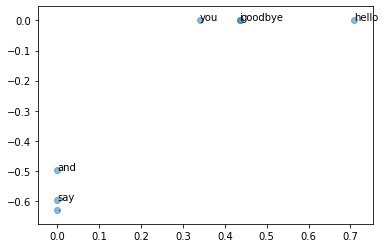

In [10]:
import matplotlib.pyplot as plt
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
    
plt.scatter(U[:,0], U[:,1], alpha = 0.5)
plt.show()

In [9]:
U

array([[ 3.409e-01,  0.000e+00, -1.205e-01, -3.886e-16, -9.323e-01,
        -1.110e-16, -2.426e-17],
       [ 0.000e+00, -5.976e-01,  0.000e+00,  1.802e-01,  0.000e+00,
        -7.812e-01,  0.000e+00],
       [ 4.363e-01, -5.551e-17, -5.088e-01, -2.220e-16,  2.253e-01,
        -1.388e-17, -7.071e-01],
       [ 1.110e-16, -4.978e-01,  2.776e-17,  6.804e-01, -1.110e-16,
         5.378e-01,  7.467e-17],
       [ 4.363e-01, -3.124e-17, -5.088e-01, -1.600e-16,  2.253e-01,
        -1.302e-17,  7.071e-01],
       [ 7.092e-01, -3.124e-17,  6.839e-01, -1.600e-16,  1.710e-01,
        -1.302e-17,  2.314e-17],
       [-1.665e-16, -6.285e-01, -4.163e-17, -7.103e-01,  2.220e-16,
         3.169e-01, -9.614e-17]], dtype=float32)